<a href="https://colab.research.google.com/github/amod404/Practice_Project/blob/main/Placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle

In [5]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d sahilislam007/college-student-placement-factors-dataset

Dataset URL: https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset
License(s): MIT
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 428MB/s]


In [7]:
!unzip college-student-placement-factors-dataset.zip

Archive:  college-student-placement-factors-dataset.zip
  inflating: college_student_placement_dataset.csv  


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, Sequential, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [26]:
df = pd.read_csv("/content/college_student_placement_dataset.csv")

In [27]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [28]:
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})
df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})

In [29]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [30]:
df = df.iloc[:,1:]

In [31]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [32]:
X = df.iloc[:,:-1]

In [33]:
y = df["Placement"]

In [34]:
print(X.shape)

(10000, 8)


In [35]:
print(y.shape)

(10000,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [45]:
history = model.fit(X_train,y_train,epochs=100,batch_size=64, validation_split=0.2)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7883 - loss: 5.0647 - val_accuracy: 0.8219 - val_loss: 1.0281
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8775 - loss: 0.7722 - val_accuracy: 0.8919 - val_loss: 0.4082
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9087 - loss: 0.3808 - val_accuracy: 0.9169 - val_loss: 0.3208
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9121 - loss: 0.3291 - val_accuracy: 0.9019 - val_loss: 0.3331
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9119 - loss: 0.3240 - val_accuracy: 0.9250 - val_loss: 0.2924
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9188 - loss: 0.3058 - val_accuracy: 0.9356 - val_loss: 0.2812
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9147 - loss: 0.2949 - val_accuracy: 0.9269 - val_loss: 0.2916
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9107 - loss: 0.3034 - val_ac

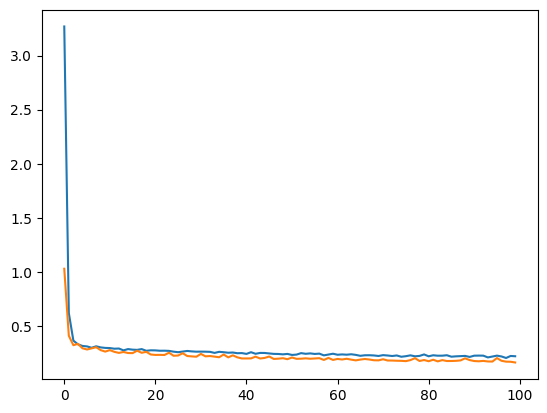

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [47]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9820 - loss: 0.1614
Test Accuracy: 0.9840


Ml model


In [48]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [49]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # kernel can be 'linear', 'rbf', 'poly', or 'sigmoid'
history = model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.949
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1674
           1       0.89      0.78      0.83       326

    accuracy                           0.95      2000
   macro avg       0.93      0.88      0.90      2000
weighted avg       0.95      0.95      0.95      2000



another try

In [50]:
model2 = Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [51]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
history2 = model2.fit(X_train,y_train,epochs=400,batch_size=200, validation_split=0.2)

Epoch 1/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.8262 - loss: 11.4787 - val_accuracy: 0.8219 - val_loss: 7.9001
Epoch 2/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8345 - loss: 6.7126 - val_accuracy: 0.8219 - val_loss: 4.4078
Epoch 3/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8638 - loss: 3.7376 - val_accuracy: 0.8219 - val_loss: 2.5612
Epoch 4/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8871 - loss: 2.0995 - val_accuracy: 0.8219 - val_loss: 1.6492
Epoch 5/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8996 - loss: 1.2454 - val_accuracy: 0.8219 - val_loss: 1.2272
Epoch 6/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9072 - loss: 0.8129 - val_accuracy: 0.8219 - val_loss: 0.9180
Epoch 7/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9062 - loss: 0.5827 - val_accuracy: 0.8219 - val_loss: 0.8362
Epoch 8/400
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9183 - loss: 0.4505 - val_accuracy: 0.8219 

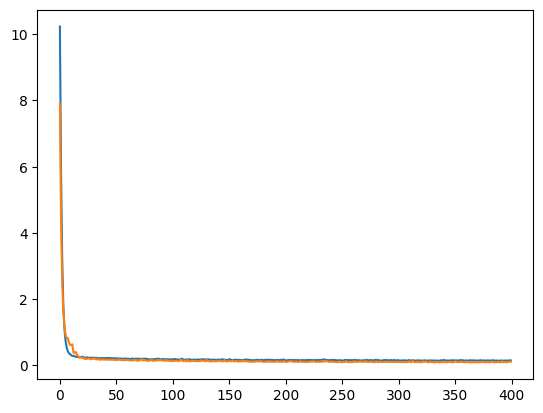

In [56]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [57]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0999
Test Accuracy: 0.9835
